In [1]:
%load_ext autoreload
%autoreload 2
from cataclop.ml.pipeline.balphagore import Balphagore

2021-10-29 10:32:12.522115: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-29 10:32:12.522186: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
balphagore = Balphagore()
balphagore.load_dataset(filters={'start_at__date__gte':'2019-01-01', 'start_at__date__lte':'2019-01-20'})

13139 races


In [25]:
balphagore.df['target'] = (balphagore.df['race_winner_dividend'] + balphagore.df['winner_dividend']) / 1000.
balphagore.TARGET = 'target'

In [24]:
balphagore.df['target'].describe()

count    159085.000000
mean         97.425282
std         142.437879
min           0.000000
25%          31.000000
50%          56.000000
75%         110.000000
max        4668.000000
Name: target, dtype: float64

In [26]:
balphagore.train()

126562 train samples, 32523 validation samples


Epoch 1/5
1978/1978 [==============================] - 13s 6ms/step - loss: 2.2988: 0s - loss
Epoch 2/5
1978/1978 [==============================] - 9s 5ms/step - loss: 2.3204
Epoch 3/5
1978/1978 [==============================] - 12s 6ms/step - loss: 2.1894
Epoch 4/5
1978/1978 [==============================] - 15s 7ms/step - loss: 2.1923
Epoch 5/5
1978/1978 [==============================] - 6s 3ms/step
Epoch 1/5
1978/1978 [==============================] - 12s 5ms/step - loss: 1.6234
Epoch 2/5
1978/1978 [==============================] - 14s 7ms/step - loss: 1.5837
Epoch 3/5
1978/1978 [==============================] - 16s 8ms/step - loss: 1.5971
Epoch 4/5
1978/1978 [==============================] - 11s 6ms/step - loss: 1.3920
Epoch 5/5
1978/1978 [==============================] - 7s 3ms/step


In [27]:
balphagore.bet(balphagore.df_train)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10512/10512 [09:27<00:00, 18.51it/s]


In [28]:
balphagore.bets.filter(regex='^top', axis=1).describe()

,top1_correct,top1_in_3_correct,top2_correct,top2_correct_disorder,top3_correct,top3_correct_disorder,top4_correct,top4_correct_disorder,top2_in_4_correct
count,10442.000000,10442.000000,10442.000000,10442.000000,10442.000000,10442.000000,10442.000000,10442.000000,10442.000000
mean,0.093948,0.280023,0.009960,0.021835,0.001724,0.011684,0.000383,0.010151,0.132733
std,0.291770,0.449032,0.099305,0.146151,0.041485,0.107462,0.019569,0.100246,0.339302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from django.db import connections, connection
#for conn in connections.all():
#    conn.close_if_unusable_or_obsolete()

In [29]:
balphagore.compute_profit()

  0%|                                                                                                                                                                | 0/10442 [00:00<?, ?it/s]/opt/pysetup/.venv/lib/python3.7/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10442/10442 [03:36<00:00, 48.25it/s]


In [30]:
import pandas as pd
pd.set_option('display.max_rows', 500)
balphagore.debug_race(balphagore.df_train)

position               sub_category  num  \
race_id                                                    
78004   12859        7.0        COURSE_A_CONDITIONS    4   
        12863        3.0        COURSE_A_CONDITIONS    8   
        12862        5.0        COURSE_A_CONDITIONS    7   
        12861        6.0        COURSE_A_CONDITIONS    6   
        12860        2.0        COURSE_A_CONDITIONS    5   
        12856        1.0        COURSE_A_CONDITIONS    1   
        12858        4.0        COURSE_A_CONDITIONS    3   
        12857        8.0        COURSE_A_CONDITIONS    2   
80359   41167        NaN                  NATIONALE   11   
        41166        NaN                  NATIONALE   10   
        41165        NaN                  NATIONALE    9   
        41161       10.0                  NATIONALE    5   
        41164        8.0                  NATIONALE    8   
        41163        4.0                  NATIONALE    7   
        41160        7.0                  NATIONALE    4   
        41168        2.0                  NATIONALE   12   
        41170        6.0                  NATIONALE   14   
        41169        9.0                  NATIONALE   13   
        41162        1.0                  NATIONALE    6   
        41157        NaN                  NATIONALE    1   
        41158        5.0                  NATIONALE    2   
        41159        3.0                  NATIONALE    3   
81688   56727        6.0                  AUTOSTART    2   
        56726        5.0                  AUTOSTART    1   
        56729        7.0                  AUTOSTART    4   
        56730        3.0                  AUTOSTART    5   
        56731        2.0                  AUTOSTART    6   
        56732        1.0                  AUTOSTART    7   
        56733        4.0                  AUTOSTART    8   
        56728        NaN                  AUTOSTART    3   
        56734        NaN                  AUTOSTART    9   
81705   56916        1.0        COURSE_A_CONDITIONS    4   
        56914        3.0        COURSE_A_CONDITIONS    2   
        56915        4.0        COURSE_A_CONDITIONS    3   
        56920        5.0        COURSE_A_CONDITIONS    8   
        56919        NaN        COURSE_A_CONDITIONS    7   
        56917        2.0        COURSE_A_CONDITIONS    5   
        56913        NaN        COURSE_A_CONDITIONS    1   
        56918        6.0        COURSE_A_CONDITIONS    6   
82249   63099        2.0        COURSE_A_CONDITIONS    9   
        63100        1.0        COURSE_A_CONDITIONS   10   
        63091       10.0        COURSE_A_CONDITIONS    1   
        63092        9.0        COURSE_A_CONDITIONS    2   
        63093        5.0        COURSE_A_CONDITIONS    3   
        63098        3.0        COURSE_A_CONDITIONS    8   
        63095        8.0        COURSE_A_CONDITIONS    5   
        63096        6.0        COURSE_A_CONDITIONS    6   
        63094        7.0        COURSE_A_CONDITIONS    4   
        63097        4.0        COURSE_A_CONDITIONS    7   
82888   70237        6.0                  AUTOSTART    9   
        70235        NaN                  AUTOSTART    7   
        70234        1.0                  AUTOSTART    6   
        70236        8.0                  AUTOSTART    8   
        70231        2.0                  AUTOSTART    3   
        70230        5.0                  AUTOSTART    2   
        70229        7.0                  AUTOSTART    1   
        70232        3.0                  AUTOSTART    4   
        70233        4.0                  AUTOSTART    5   
83894   82196        9.0                    INCONNU    1   
        82197        4.0                    INCONNU    2   
        82198        8.0                    INCONNU    3   
        82199        6.0                    INCONNU    4   
        82200        2.0                    INCONNU    5   
        82201        2.0                    INCONNU    6   
        82202        5.0                    INCONNU    7

In [55]:
b = balphagore.bets
#b = b[(b['category']=='ATTELE') & (b['final_odds']>=10)]
b = b[(b['pred'] != 0) & (b['category']=='PLAT') ]
#b = b[(b['pred'] < 0.6)]

In [ ]:
b[b['race_id']==78881][['combo', 'combo_real']]

In [34]:
b['pred'].describe()

count    10442.000000
mean         1.036497
std          0.504492
min          0.000000
25%          0.758264
50%          0.961468
75%          1.206913
max          7.305800
Name: pred, dtype: float64

In [56]:
b.filter(regex='^top', axis=1).describe()

,top1_correct,top1_in_3_correct,top2_correct,top2_correct_disorder,top3_correct,top3_correct_disorder,top4_correct,top4_correct_disorder,top2_in_4_correct
count,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000
mean,0.098501,0.295741,0.011182,0.024744,0.002855,0.015941,0.000714,0.014989,0.156555
std,0.298026,0.456429,0.105167,0.155363,0.053363,0.125262,0.026710,0.121524,0.363424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
b.filter(regex='^profit_', axis=1).describe()

,profit_win,profit_placed,profit_top2_correct,profit_top2_correct_disorder,profit_top3_correct,profit_top3_correct_disorder,profit_top4_correct,profit_top4_correct_disorder,profit_top2_in_4_correct
count,4203.000000,4203.000000,4203.0,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000,4203.000000
mean,-0.290174,-0.245444,0.0,-0.430954,0.013371,-0.184820,-0.028551,-0.214728,-0.232524
std,3.159033,1.668342,0.0,7.225425,4.403500,14.499837,0.166561,1.507119,2.376649
min,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,0.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000
50%,-1.000000,-1.000000,0.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000
75%,-1.000000,0.200000,0.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
max,76.500000,22.700000,0.0,369.000000,222.200000,534.500000,0.000000,93.500000,77.300000


In [ ]:
b[b['profit_top3_correct'] > 0][['race_id', 'start_at', 'music', 'combo', 'combo_real', 'profit_top3_correct', 'profit_top3_correct_disorder']]

<AxesSubplot:>

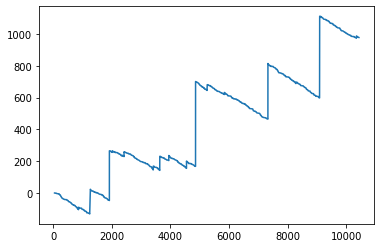

In [54]:
b['profit_top3_correct_disorder'].cumsum().plot()

In [ ]:
balphagore.save_model()

In [ ]:
balphagore2 = Balphagore()
balphagore2.load_dataset(filters={'start_at__date__gte':'2021-09-01', 'start_at__date__lte':'2021-10-01'})

In [ ]:
balphagore2.load_model()


In [ ]:
balphagore2.models = balphagore.models
balphagore2.models

In [ ]:
balphagore2.predict(balphagore2.df)

In [ ]:
balphagore2.debug_race()

In [ ]:
balphagore2.bet(balphagore2.df)

In [ ]:
balphagore2.compute_profit()

In [ ]:
b = balphagore2.bets

In [ ]:
b.filter(regex='^top', axis=1).describe()

In [ ]:
b.filter(regex='^profit_', axis=1).describe()

In [ ]:
b[b['profit_win'] > 0][['race_id', 'start_at', 'music', 'combo', 'combo_real', 'profit_win', 'final_odds']]